# Task 4
# Exploratory Data Analysis - Terrorism

Sanjay kumar J

Data Science & Business Analytics Tasks

July 2021 batch

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('global_terrorism_db.csv',encoding = 'latin1')
df.shape

/home/android/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(181691, 135)

In [3]:
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [4]:
# if the number dosent match with number of rows we can say their is missing of data or the columns has None in it
df.count()

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate      9239
               ...  
INT_LOG       181691
INT_IDEO      181691
INT_MISC      181691
INT_ANY       181691
related        25038
Length: 135, dtype: int64

In [5]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
# picking the columns which are only required
df = df[['iyear', 'imonth', 'iday', 'country_txt', 'provstate', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'summary', 'attacktype1_txt', 'gname', 'motive', 'targtype1_txt', 'weaptype1_txt', 'nkill', 'nwound']]
df.shape

(181691, 18)

In [7]:
df.isnull().sum()


iyear                   0
imonth                  0
iday                    0
country_txt             0
provstate             421
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
summary             66129
attacktype1_txt         0
gname                   0
motive             131130
targtype1_txt           0
weaptype1_txt           0
nkill               10313
nwound              16311
dtype: int64

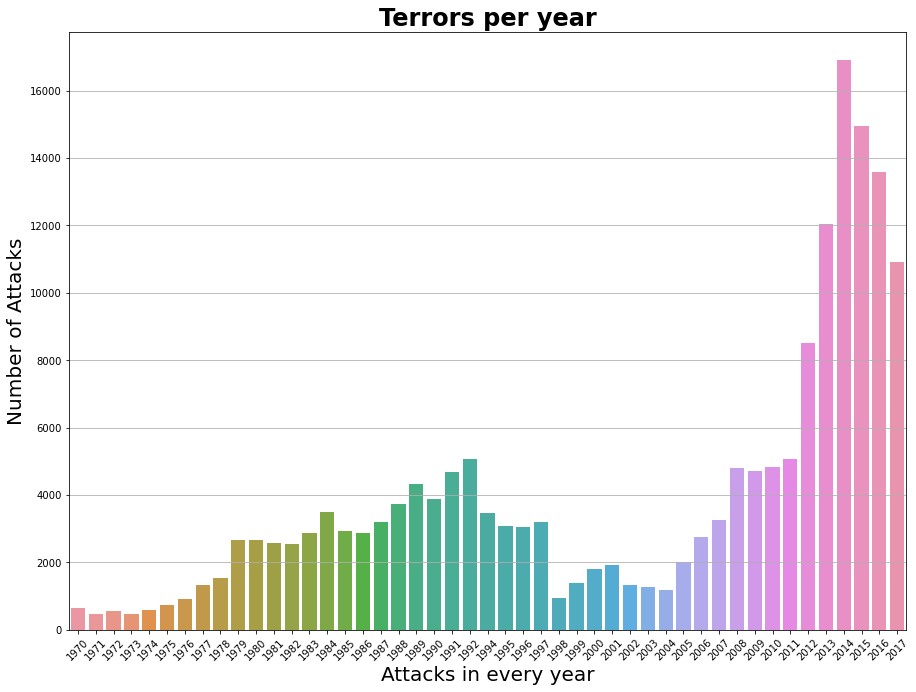

In [8]:
plt.rcParams["figure.figsize"] = 15, 11
sns.countplot(x = df["iyear"])
plt.ylabel("Number of Attacks", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("Attacks in every year", fontsize=20)
plt.title("Terrors per year", size=24, fontweight="bold")
plt.grid(axis='y')
plt.show()

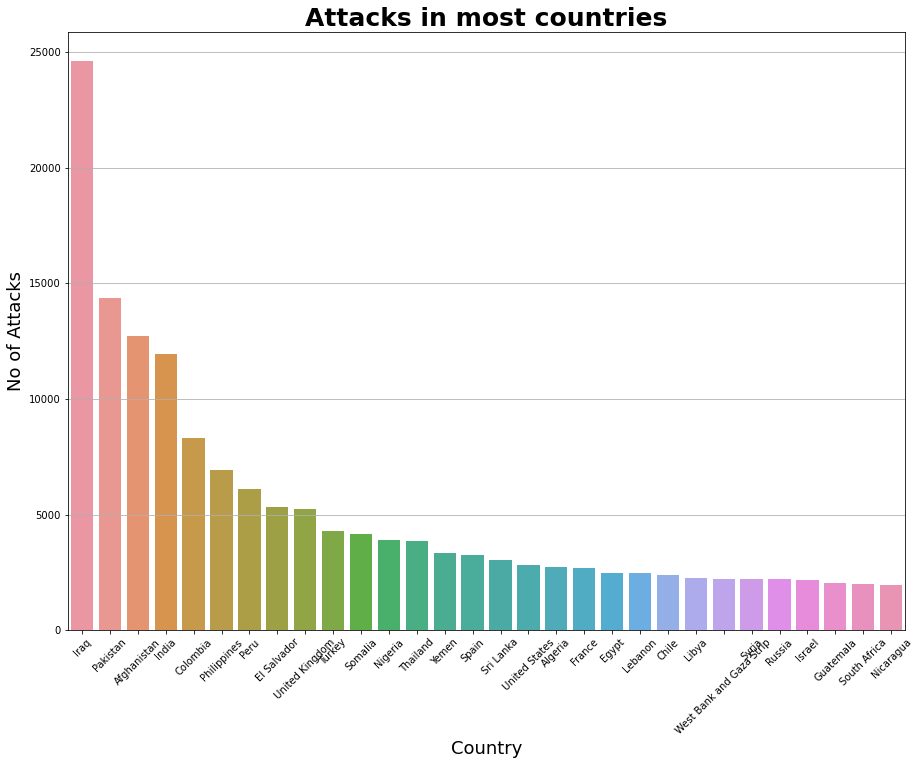

In [9]:
plt.rcParams["figure.figsize"] = 15, 11
sns.barplot(x = df["country_txt"].value_counts()[:30].index, y=df["country_txt"].value_counts()[:30].values)
plt.ylabel("No of Attacks", fontsize=18)
plt.xticks(rotation=45)
plt.xlabel("Country", fontsize=18)
plt.grid(axis='y')
plt.title("Attacks in most countries", size=25, fontweight="bold")
plt.show()

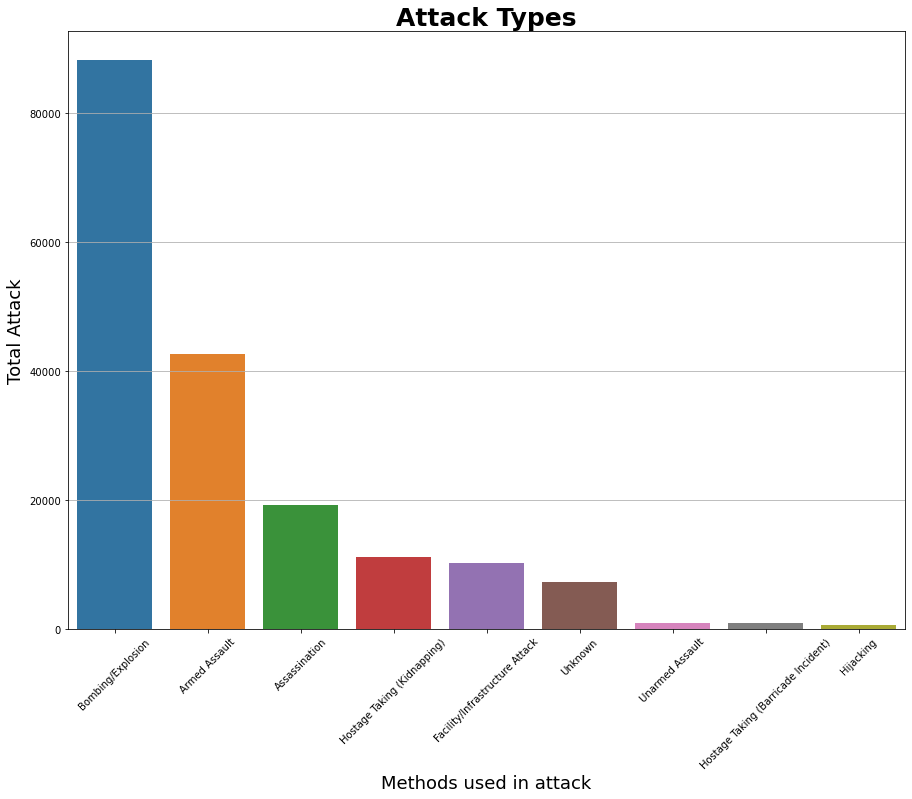

In [10]:
plt.rcParams["figure.figsize"] = 15, 11
sns.barplot(x = df["attacktype1_txt"].value_counts()[:30].index, y=df["attacktype1_txt"].value_counts()[:30].values)
plt.ylabel("Total Attack", fontsize=18)
plt.xticks(rotation=45)
plt.xlabel("Methods used in attack", fontsize=18)
plt.grid(axis='y')
plt.title("Attack Types", size=25, fontweight="bold")
plt.show()

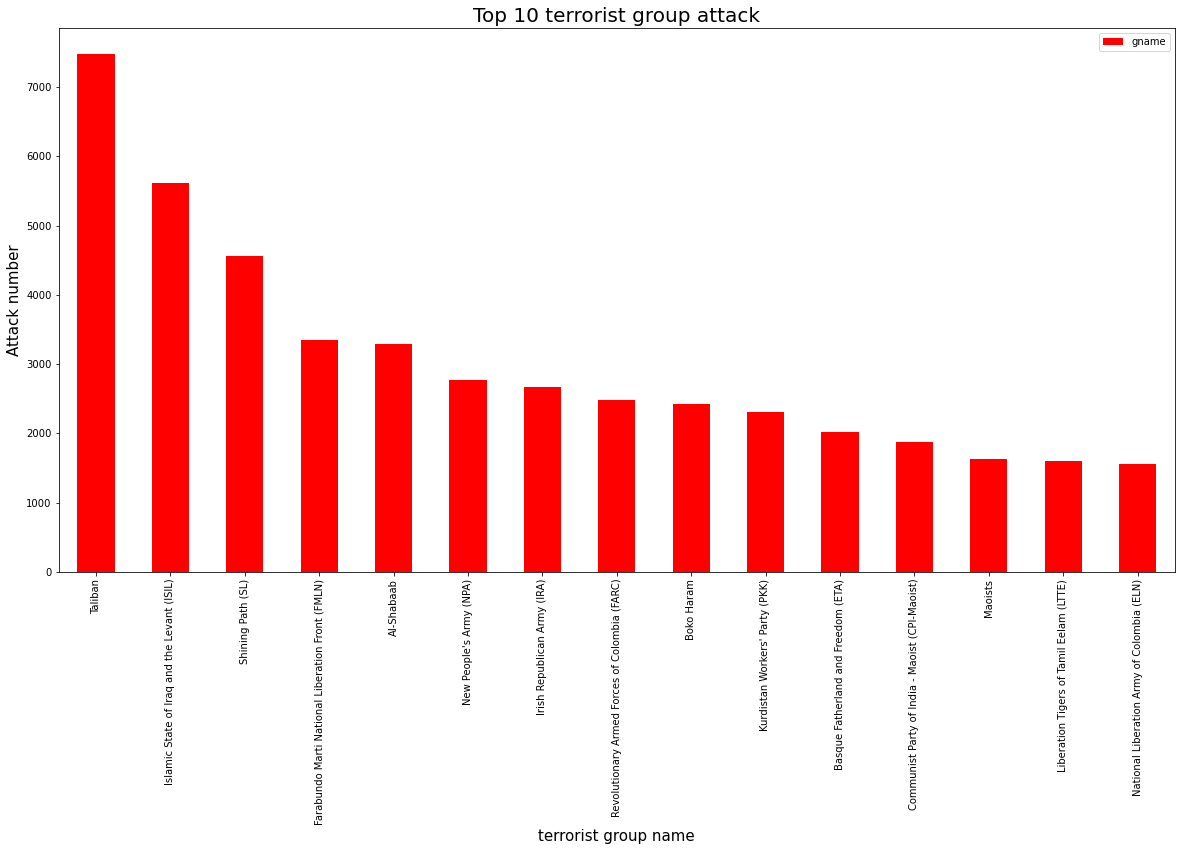

In [11]:
df['gname'].value_counts().to_frame().drop('Unknown').head(15).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()